![](../../logo.png)

# Physics Informed Neural Networks in Astrophysics

---

### Alexis Larrañaga - 2024
ealarranaga@unal.edu.co

---

## System of ODEs  

$$
\begin{align}
\frac{d^2 u}{dt^2} - \left(\frac{d u}{dt}\right)^2  = &0 \\
\frac{d x}{dt} + \frac{d u}{dt} - x  = &0 \\
\frac{d^3y}{dt^3} - \frac{d^2x}{dt^2} + u  = &0
\end{align}
$$

Initial conditions: 
$$
\begin{cases}
u(t=0) = & 1\\
u'(t=0) = & 0.5\\
x(t=0) = & 1\\
y(t=0) = & 1\\
y'(t=0) = & -0.5\\
y''(t=0) = & 0
\end{cases}
$$

In [1]:
import pinnde.ode_Solvers as ode_Solvers
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt



eqn1 = "utt - ut**2"
eqn2 = "xt + ut - x"
eqn3 = "yttt - xtt + u"
eqns = [eqn1, eqn2, eqn3]
orders = [2, 1, 3]
inits = [[1, 0.5], [1], [1, -0.5, 0]]
t_bdry = [0,1]
N_pde = 100
epochs = 1000

mymodel = ode_Solvers.solveODE_System_IVP(eqns, orders, inits, t_bdry, N_pde, epochs)



mymodel.plot_epoch_loss('epoch_loss.png')

mymodel.plot_solution_prediction('solution.png')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 40)        │         80 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 40)        │      1,640 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 40)        │      1,640 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 40)        │      1,640 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         41 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         41 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │         41 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,123 (20.01 KB)

 Trainable params: 5,123 (20.01 KB)

 Non-trainable params: 0 (0.00 B)

DE loss, IV loss in 0th epoch:  0.1215,  4.5743.
DE loss, IV loss in 100th epoch:  0.0846,  0.0352.
DE loss, IV loss in 200th epoch:  0.0331,  0.0119.
DE loss, IV loss in 300th epoch:  0.0191,  0.0069.
DE loss, IV loss in 400th epoch:  0.0141,  0.0050.
DE loss, IV loss in 500th epoch:  0.0114,  0.0039.
DE loss, IV loss in 600th epoch:  0.0091,  0.0034.
DE loss, IV loss in 700th epoch:  0.0110,  0.0019.
DE loss, IV loss in 800th epoch:  0.0057,  0.0025.
DE loss, IV loss in 900th epoch:  0.0070,  0.0013.


<Figure size 640x480 with 0 Axes>

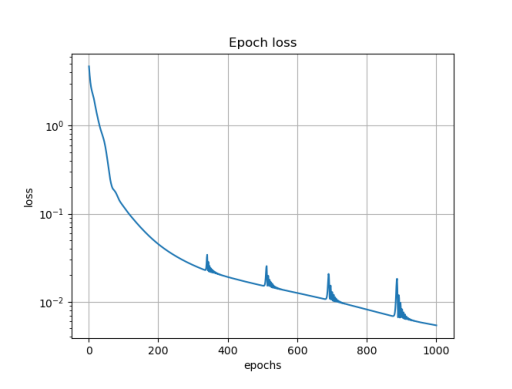

In [2]:
plt.imshow(mpimg.imread('epoch_loss.png'))
plt.axis('off')
plt.show()

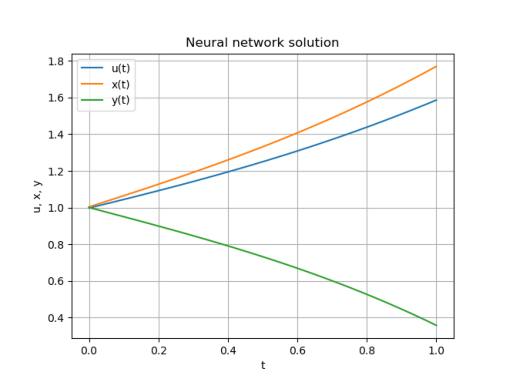

In [3]:
plt.imshow(mpimg.imread('solution.png'))
plt.axis('off')
plt.show()